# Explore here

In [134]:
#Imports
import pandas as pd
import numpy as np 
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.model_selection import GridSearchCV
import joblib
import os

Loading the data 

In [89]:
#Loading the data set 
df = pd.read_csv('/workspaces/JMP1ST-Decision-tree/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


EDA

In [90]:
#Shape analysis
df.shape

(768, 9)

We are working with 768 rows spread throug 9 variables

In [91]:
#Info analysis (values distribution)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We can see that the df has 2 type float variables and the resting 7 are mere integer values which makes sense due to the nature of our data, there appears to be no null values but we will inspect that later.

In [92]:
#Unique values searching 
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

There is a high variaty of unique values as the variables are composed of structured responses (determined by studying the patient and unique due to the body composition). ``Outcomes`` contains just two unique values as it is our objective variables and determines if a patiente has diabetes or not, 0 being negative in diabetes and 1 positive.

In [93]:
#Checking waht those unique values are (This returns an array of uniques values per column)

#For each col(i) in columns(range) check for unique values
for col in df.columns:
    print(f"\n{col} - Unique values:")
    print(df[col].unique())


Pregnancies - Unique values:
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

Glucose - Unique values:
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]

BloodPressure - Unique values:
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]

SkinThickness - Unique values:
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10

Now let's search for duplicated values 

In [94]:
#Checking for duplicated values and then checking dups transposing the data 
print(F"Amount of duplicated values is: {df.duplicated().sum()}")

print(F"List of duplicated values (transposed):\n{df.duplicated().T}")

Amount of duplicated values is: 0
List of duplicated values (transposed):
0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool


As we can see there are no duplicated values in the entire df. We can continue with our exploration.

In [95]:
#Checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [96]:
#Checkin NAN
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [97]:
#Let's inspect the value counts of our df 
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
             73       0              0              0        21.1  0.342                     25   0          1
             74       52             10             36       27.8  0.269                     22   0          1
             78       88             29             40       36.9  0.434                     21   0          1
                                                                                                            ..
13           158      114            0              0        42.3  0.257                     44   1          1
14           100      78             25             184      36.6  0.412                     46   1          1
      

Despite of not having null or Nan values, there are variables like Glucose, BloodPressure, SkinThickness, Insulin and BMI that should not have 0 as a value because it does not correspond with the regular physiological values of a living human being, let's inspect those instances where the variables aforementioned are 0 and later decide how to handle them.

In [98]:
#Counting how many zero values exist in each column
zero_counts = (df == 0).sum()
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


As part of the analysis, we investigated zero values in the dataset, since no missing values (`NaN`) were found. We discovered that several features contain zeroes that are medically implausible and likely represent missing data. Specifically, Glucose (5), BloodPressure (35), SkinThickness (227), Insulin (374), and BMI (11) contain zero values that are biologically impossible or extremely unlikely. For instance, Glucose and BloodPressure cannot be zero in a living person, and a BMI of 0 implies either zero weight or infinite height, which is unrealistic. SkinThickness and Insulin values of 0 likely indicate unmeasured data. Therefore, these values will be treated as missing and replaced with `NaN`. In contrast, columns like Pregnancies (111 zeroes), DiabetesPedigreeFunction, Age, and Outcome have zero values that are valid and require no modification. Replacing the invalid zeros with `NaN`  will allow for accurate imputation.


In [99]:
#Filling 0 as value with NaN in order to locate them and then impute them
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)

#Checking the NaN values distribution as 0=NaN now
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [100]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


So, based on the multiple instances of NaN throug our df and the imposibility to train any model with that amount of missing values, we have determined that the solution will be to impute those 0=NaN values in the aforementioned rows (the one that requires it) and the imputation method will be KNN due to the fact that works with similar samples, its simplicity and the overall performance of the imputed values as we expect a correlation between variables later on. 

Let's impute the values using KNN

In [101]:
#Defining the values to be imputed using K=5 as the library instructs to do (default)
imputer = KNNImputer(n_neighbors=5)

#Applying the imputer to the df (this returns a numpy array)
df_imputed = imputer.fit_transform(df)

#Reversing the numpy array back to a df 
knn_imputed_df = pd.DataFrame(df_imputed, columns=df.columns)

In [102]:
#Saving the imputed df as the new df
knn_imputed_df.to_csv("knn_imputed_diabetes.csv", index=False)

In [103]:
knn_imputed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [104]:
#Checking and contrasting the new df

#Zero counts
zero_counts = (knn_imputed_df == 0).sum()
print(zero_counts)

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [105]:
#Checking the NaN values distribution as 0=NaN now
knn_imputed_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Now that we have imputed the NaN values using KNN with K=5 we can clearly see that there are no further NaN or 0 values in the relevant variables that we need to be filled in order to train our model. 

We can move on to analyze the statistics.

In [106]:
#Checking the statistics 
knn_imputed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.598177,30.496543,44.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,72.371354,12.206417,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.114583,9.424100,7.000,23.00000,29.0000,35.00000,99.00
Insulin,768.0,153.180208,98.385308,14.000,87.90000,133.7000,190.15000,846.00
BMI,768.0,32.427344,6.886588,18.200,27.50000,32.0900,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


After cleaning and imputing the data using the KNN method, we analyzed the statistical summary of each feature. Most variables now fall within realistic ranges. The Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, and BMI features are biologically plausible. However, some features, such as BloodPressure (min = 24), SkinThickness (max = 99), Insulin (max = 846), and BMI (max = 67.1), show signs of potential outliers. These outliers may represent rare but real medical conditions or data recording anomalies, so they warrant further visual inspection before modeling. The Outcome variable shows a class imbalance, with only ~35% positive cases.7

Let's visualize this relations in those variables that require further visual inspection. 

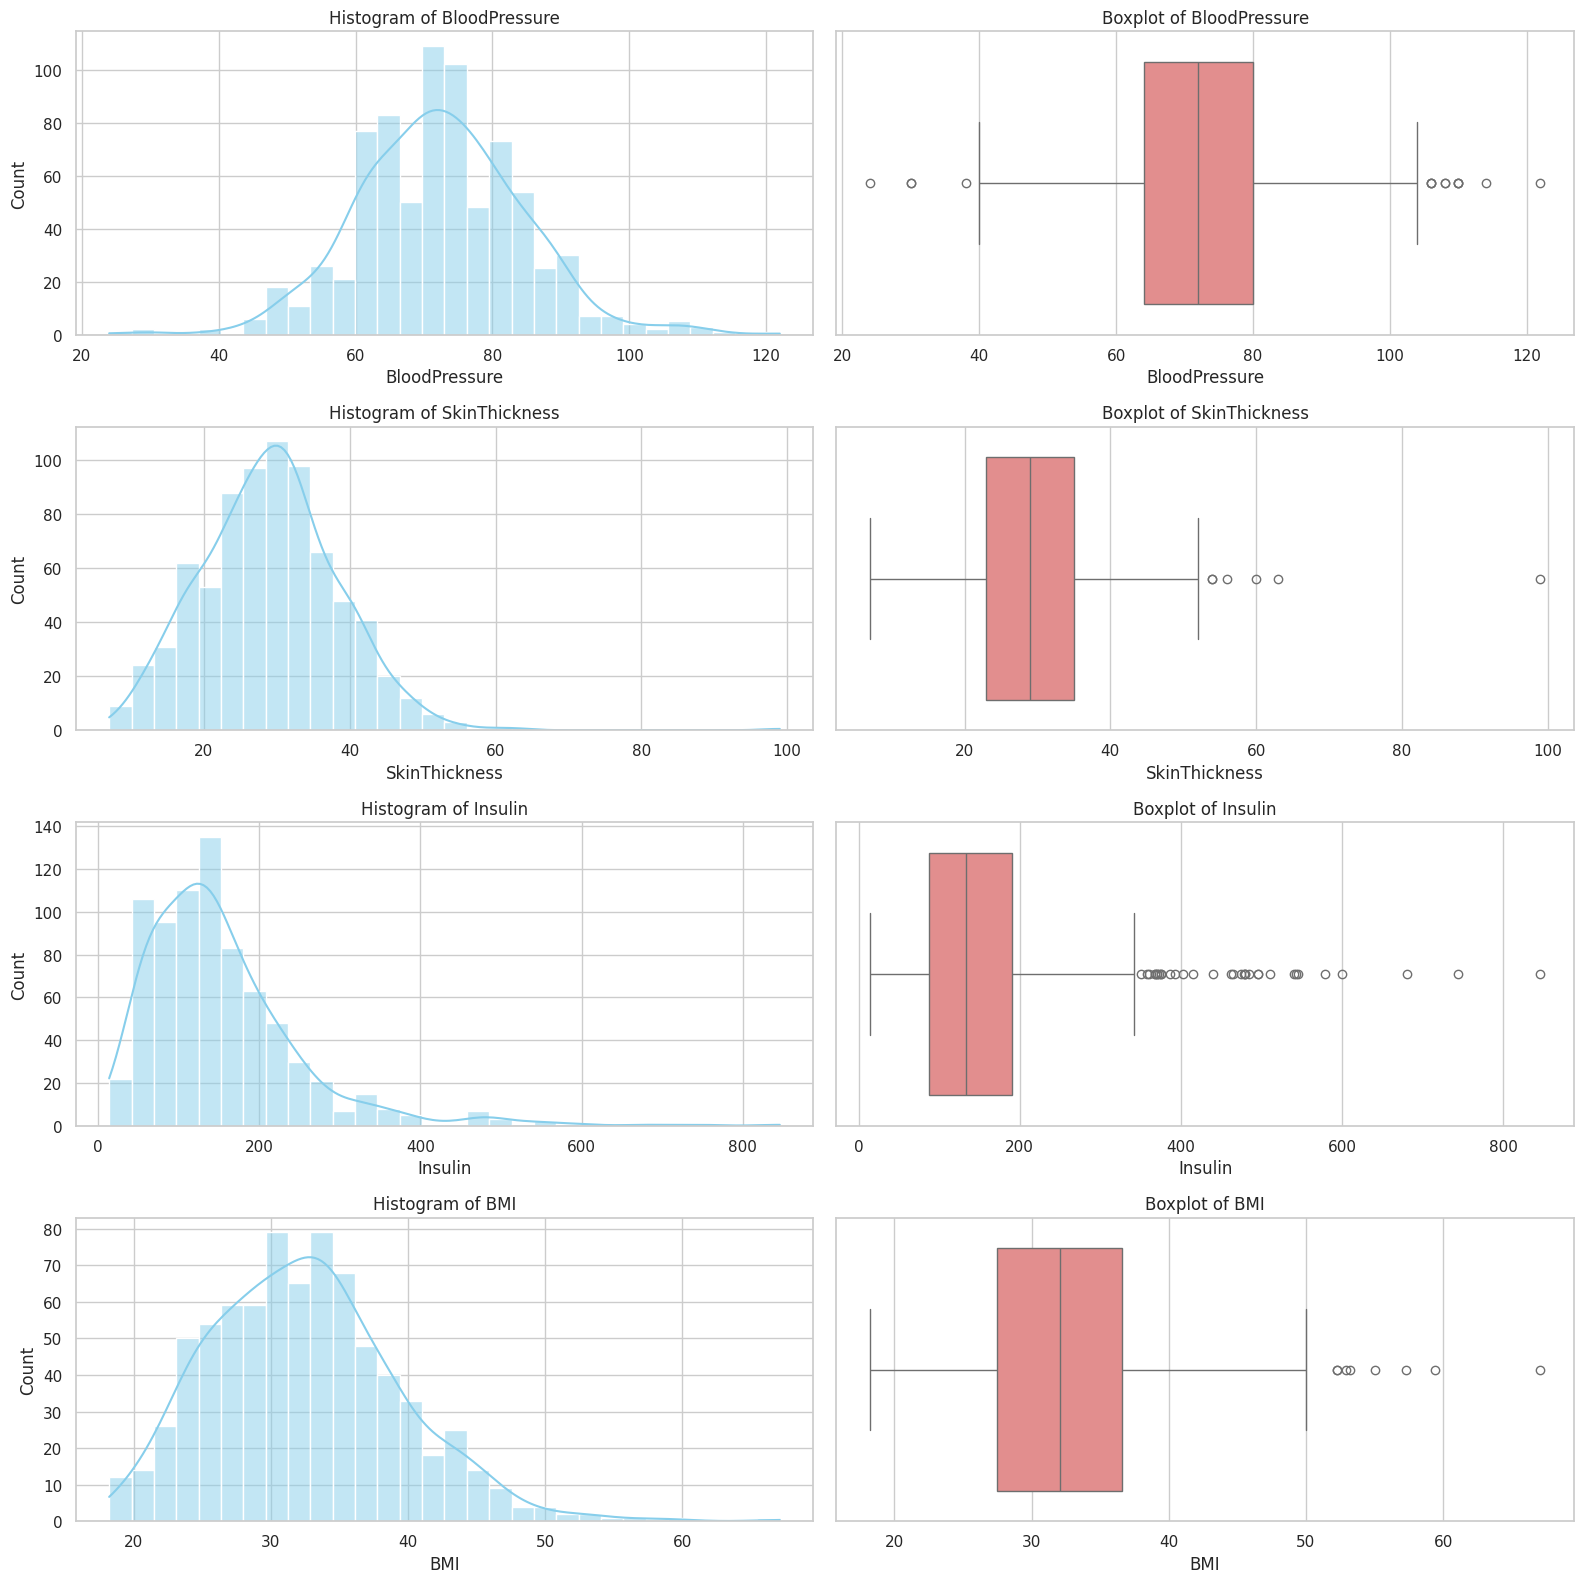

In [107]:
#Plots

#Seting 
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 16))

#List of columns to visualize
cols = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for i, col in enumerate(cols):
    plt.subplot(len(cols), 2, i*2 + 1)
    sns.histplot(knn_imputed_df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    
    plt.subplot(len(cols), 2, i*2 + 2)
    sns.boxplot(x=knn_imputed_df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

The histograms and boxplots revealed key insights into the distribution and quality of several variables. While ``BloodPressure`` showed a fairly normal distribution with few mild outliers, both ``SkinThickness`` and ``Insulin`` were noticeably right-skewed with several extreme values, especially in the upper range. ``BMI`` displayed a near-normal distribution with slight skewness and a few high-value outliers consistent with cases of severe obesity. These findings indicate that while the dataset is generally clean, certain variables will benefit from transformation due to skewness and outliers.

Handling outliers and skewness

In [108]:
#Applying log transformation to Insulin to make its distribution more normal and manageable.
knn_imputed_df['Insulin'] = np.log1p(knn_imputed_df['Insulin'])

In [109]:
#Caping SkinThickness at the 99th percentile (outliers are fewer and migth be because of biological extremes or measurement errors)

#Find the 99th percentile
skin_cap = knn_imputed_df['SkinThickness'].quantile(0.99)

#Cap values above it
knn_imputed_df['SkinThickness'] = np.where(knn_imputed_df['SkinThickness'] > skin_cap, skin_cap, knn_imputed_df['SkinThickness'])

Now that the two most "problematic" variables have been handled let's take a look on the distribution of those values 

<Figure size 1600x1000 with 0 Axes>

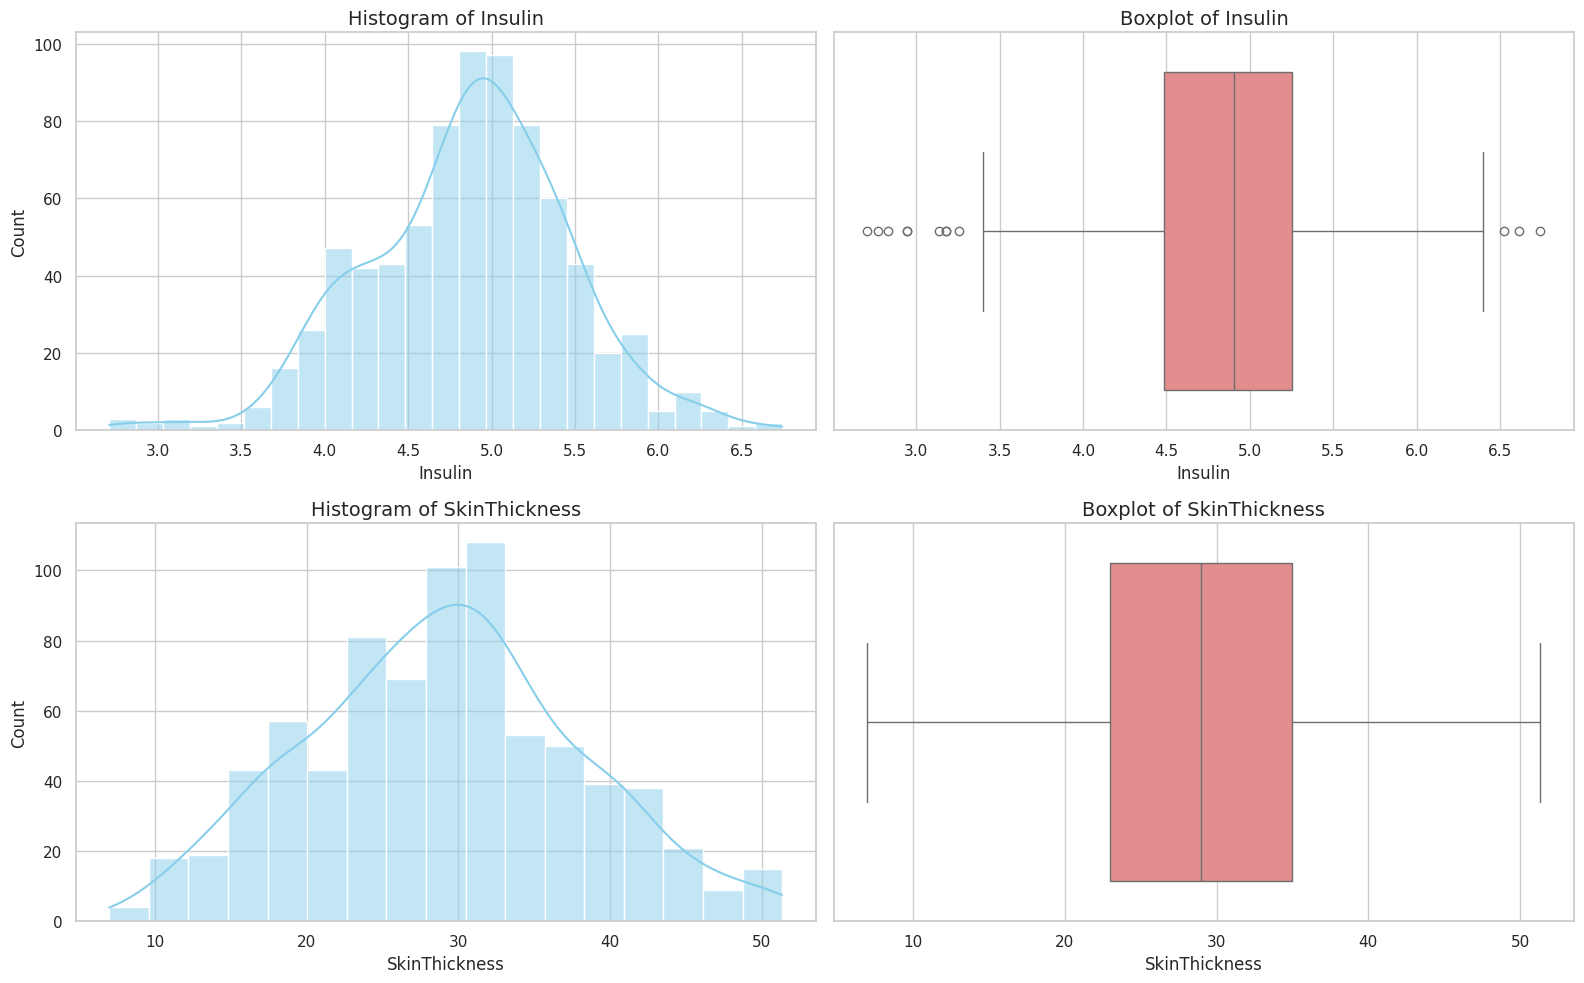

In [110]:
#Plots

#Setup
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 10))

#Variables to plot
features = ['Insulin', 'SkinThickness']

#Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

for i, feature in enumerate(features):
    #Histogram
    sns.histplot(knn_imputed_df[feature], kde=True, ax=axes[i][0], color='skyblue')
    axes[i][0].set_title(f'Histogram of {feature}', fontsize=14)
    
    #Boxplot
    sns.boxplot(x=knn_imputed_df[feature], ax=axes[i][1], color='lightcoral')
    axes[i][1].set_title(f'Boxplot of {feature}', fontsize=14)

plt.tight_layout()
plt.show()

After analyzing the initial distributions of the variables, we applied transformations to manage skewness and outliers. The variable Insulin, which exhibited a strong right-skewed distribution with many extreme values, was log-transformed, resulting in a more symmetric and compact distribution. This greatly reduced the influence of extreme values and made the feature more suitable for modeling. Meanwhile, SkinThickness, which contained several high outliers including one near 100 mm, was capped at the 99th percentile. This preserved the main structure of the distribution while limiting the impact of rare, potentially abnormal values. Post-transformation histograms and boxplots confirm a more balanced and controlled spread for both features.

As the df now contains a clean version of the defined values and the distribution has been normalized we can continue with the next step.

Data partitioning

In [111]:
knn_imputed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,5.135798,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,4.087656,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,5.109575,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,4.553877,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,5.129899,43.1,2.288,33.0,1.0


In [112]:
#Splitting the data
X = knn_imputed_df.drop(columns=['Outcome'])
y = knn_imputed_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now, after our data has been splited we can proceed with the main part of this project that consist of implementing a Decision Tree 

<Axes: >

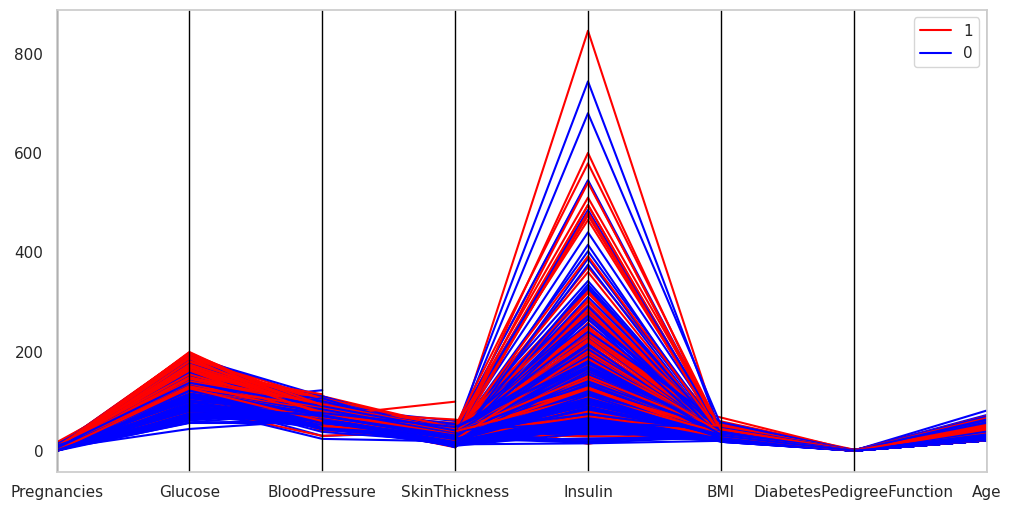

In [113]:
#Visualization of how different features behave across the classes
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df, 'Outcome', color=['red', 'blue'])

The plot provided a visual overview of how each feature in the dataset relates to the target variable, Outcome (diabetes diagnosis). We observed that non-diabetic patients (blue lines) tend to cluster toward lower values on most feature axes, particularly for Glucose, BMI, and Pregnancies. In contrast, diabetic patients (red lines) more frequently appear in the higher value ranges of these same features, suggesting a strong association. Notably, the Insulin feature shows a high level of overlap between red and blue lines, forming a dense triangle pattern, which implies it may be a weak predictor because of its variability across both classes. 

Let's build now the Decision tree (simple and complex) and train it.

In [114]:
#Building and training simple tree
simple_tree = DecisionTreeClassifier(
    max_depth=3,
    max_features=X_train.shape[1] // 2,
    min_samples_leaf=20,
    min_samples_split=30,
    random_state=42
)
simple_tree.fit(X_train, y_train)

#Building and training complex tree
complex_tree = DecisionTreeClassifier(
    max_depth=100,
    min_samples_leaf=1,
    random_state=42
)
complex_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,100
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


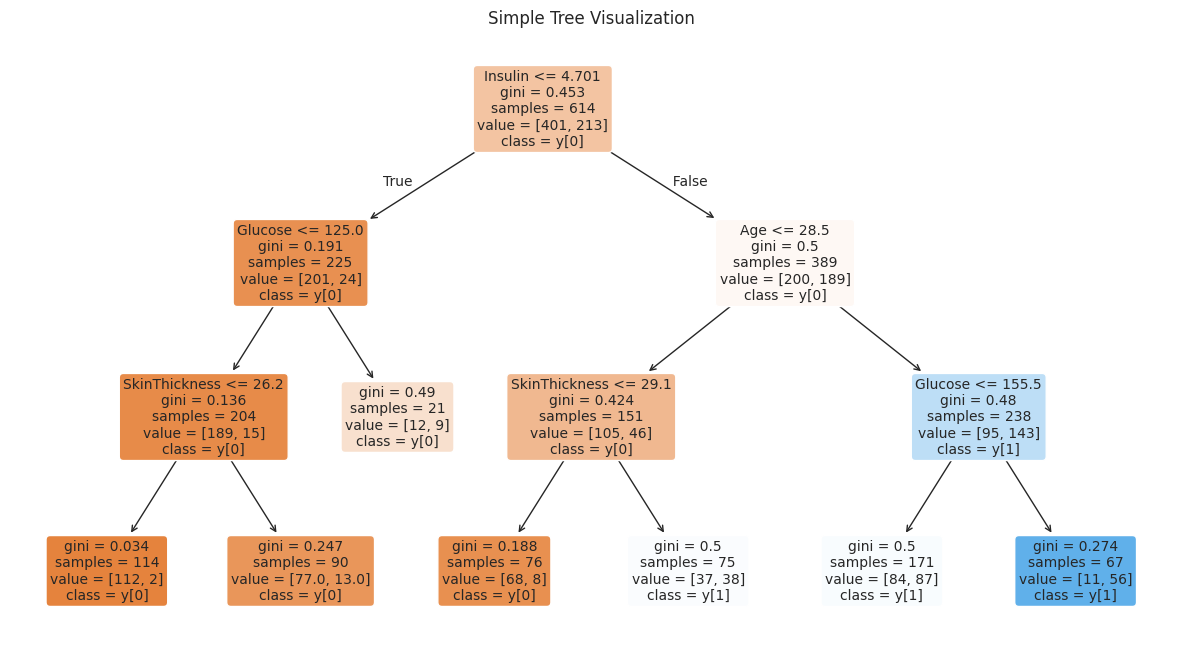

<Figure size 640x480 with 0 Axes>

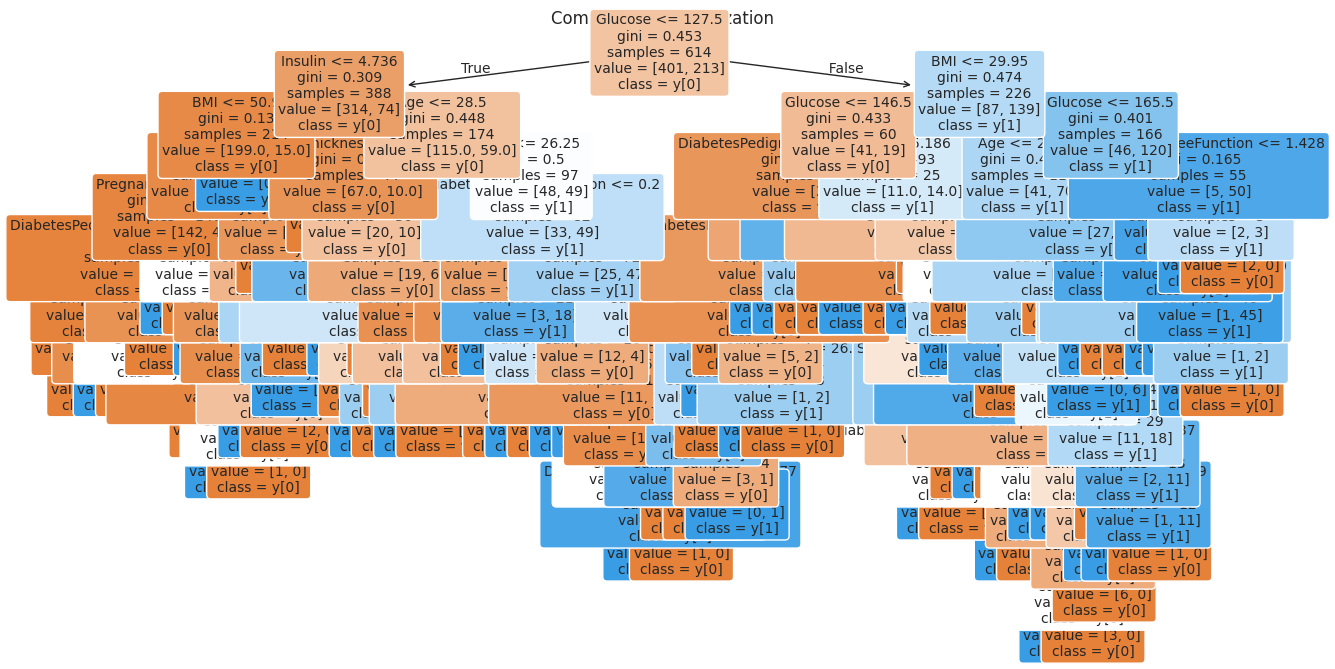

<Figure size 640x480 with 0 Axes>

In [115]:
#Visualization of both Trees

#Simple tree
plt.figure(figsize=(15, 8))
plot_tree(
    simple_tree,
    feature_names=X_train.columns,
    class_names=True,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Simple Tree Visualization")
plt.show()
plt.tight_layout()

#Complex tree
plt.figure(figsize=(15, 8))
plot_tree(
    complex_tree,
    feature_names=X_train.columns,
    class_names=True,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Complex Tree Visualization")
plt.show()
plt.tight_layout()

In [116]:
#Evaluating the metrics and performances

#Simple tree
y_train_pred_simple = simple_tree.predict(X_train)
y_test_pred_simple = simple_tree.predict(X_test)

print(f"Simple Tree Train Accuracy: {accuracy_score(y_train, y_train_pred_simple):.4f}")
print(f"Simple Tree Test Accuracy: {accuracy_score(y_test, y_test_pred_simple):.4f}")

#Complex tree
y_train_pred_complex = complex_tree.predict(X_train)
y_test_pred_complex = complex_tree.predict(X_test)

print(f"Complex Tree Train Accuracy: {accuracy_score(y_train, y_train_pred_complex):.4f}")
print(f"Complex Tree Test Accuracy: {accuracy_score(y_test, y_test_pred_complex):.4f}")

Simple Tree Train Accuracy: 0.7329
Simple Tree Test Accuracy: 0.5974
Complex Tree Train Accuracy: 1.0000
Complex Tree Test Accuracy: 0.6623


In [117]:
#Text interpretation for simple tree 
simple_tree_text_interp = export_text(simple_tree, feature_names=list(X_train.columns))
print(F"Simple Tree interpretation\n {simple_tree_text_interp}")

#Text interpretation for complex tree
complex_tree_text_interp = export_text(complex_tree, feature_names=list(X_train.columns))
print(F"Complex Tree interpretation\n{complex_tree_text_interp}")

Simple Tree interpretation
 |--- Insulin <= 4.70
|   |--- Glucose <= 125.00
|   |   |--- SkinThickness <= 26.20
|   |   |   |--- class: 0.0
|   |   |--- SkinThickness >  26.20
|   |   |   |--- class: 0.0
|   |--- Glucose >  125.00
|   |   |--- class: 0.0
|--- Insulin >  4.70
|   |--- Age <= 28.50
|   |   |--- SkinThickness <= 29.10
|   |   |   |--- class: 0.0
|   |   |--- SkinThickness >  29.10
|   |   |   |--- class: 1.0
|   |--- Age >  28.50
|   |   |--- Glucose <= 155.50
|   |   |   |--- class: 1.0
|   |   |--- Glucose >  155.50
|   |   |   |--- class: 1.0

Complex Tree interpretation
|--- Glucose <= 127.50
|   |--- Insulin <= 4.74
|   |   |--- BMI <= 50.90
|   |   |   |--- Insulin <= 4.49
|   |   |   |   |--- Pregnancies <= 11.50
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.68
|   |   |   |   |   |   |--- Pregnancies <= 6.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Pregnancies >  6.50
|   |   |   |   |   |   |   |--- Insulin <= 4.33
|   |  

INTERPRETATION OF THIS! 

Training decision trees with different purity criteria

In [118]:
#Initializing models with different criteria
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_logloss = DecisionTreeClassifier(criterion='log_loss', random_state=42)

#Training each tree
tree_gini.fit(X_train, y_train)
tree_entropy.fit(X_train, y_train)
tree_logloss.fit(X_train, y_train)

,criterion,'log_loss'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [119]:
#Predictions for tree_gini
train_pred_gini = tree_gini.predict(X_train)
test_pred_gini = tree_gini.predict(X_test)
train_prob_gini = tree_gini.predict_proba(X_train)[:, 1]  
test_prob_gini = tree_gini.predict_proba(X_test)[:, 1]    


#Predictions for tree_entropy
train_pred_entropy = tree_entropy.predict(X_train)  
test_pred_entropy = tree_entropy.predict(X_test)   
train_prob_entropy = tree_entropy.predict_proba(X_train)[:, 1] 
test_prob_entropy = tree_entropy.predict_proba(X_test)[:, 1]


#Predictions for tree_logloss
train_pred_logloss = tree_logloss.predict(X_train)
test_pred_logloss = tree_logloss.predict(X_test)
train_prob_logloss = tree_logloss.predict_proba(X_train)[:, 1]
test_prob_logloss = tree_logloss.predict_proba(X_test)[:, 1]

In [120]:
#Getting the metrics following class method 
def get_metrics(y_train, y_test, y_pred_train, y_pred_test, y_prob_train, y_prob_test):
    #Metrics for training set
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_prob_train)  
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    #Metrics for test set
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_prob_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    #Differences
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    #Creating metrics DataFrame
    metrics_df = pd.DataFrame(
        [
            [train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],
            [test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],
            [diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]
        ],
        columns=['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
        index=['Train', 'Test', 'Diference']
    )

    return metrics_df


In [121]:
metrics_gini = get_metrics(y_train, y_test, train_pred_gini, test_pred_gini, train_prob_gini, test_prob_gini)
metrics_entropy = get_metrics(y_train, y_test, train_pred_entropy, test_pred_entropy, train_prob_entropy, test_prob_entropy)
metrics_logloss = get_metrics(y_train, y_test, train_pred_logloss, test_pred_logloss, train_prob_logloss, test_prob_logloss)

print("Gini Criterion Metrics:\n", metrics_gini, "\n")
print("Entropy Criterion Metrics:\n", metrics_entropy, "\n")
print("Log Loss Criterion Metrics:\n", metrics_logloss, "\n")

Gini Criterion Metrics:
            Accuracy        F1       AUC  Precision    Recall  Specificity
Train      1.000000  1.000000  1.000000    1.00000  1.000000     1.000000
Test       0.662338  0.551724  0.644444    0.52459  0.581818     0.707071
Diference  0.337662  0.448276  0.355556    0.47541  0.418182     0.292929 

Entropy Criterion Metrics:
            Accuracy        F1       AUC  Precision    Recall  Specificity
Train      1.000000  1.000000  1.000000   1.000000  1.000000     1.000000
Test       0.688312  0.586207  0.672727   0.557377  0.618182     0.727273
Diference  0.311688  0.413793  0.327273   0.442623  0.381818     0.272727 

Log Loss Criterion Metrics:
            Accuracy        F1       AUC  Precision    Recall  Specificity
Train      1.000000  1.000000  1.000000   1.000000  1.000000     1.000000
Test       0.688312  0.586207  0.672727   0.557377  0.618182     0.727273
Diference  0.311688  0.413793  0.327273   0.442623  0.381818     0.272727 



All three decision tree models perform perfectly on the training data (Accuracy, F1, and AUC all equal to 1.0), indicating clear overfitting. On the test data, the entropy and log loss models slightly outperform the Gini model, with test accuracies around 0.69 versus 0.66, F1 scores about 0.59 versus 0.55, and AUC values near 0.67 versus 0.64. Recall is also higher for entropy and log loss (around 0.62) compared to Gini (0.58). However, these improvements are small, and all models show a significant drop in performance from training to testing, confirming overfitting.

Next, we will work on reducing this overfitting by tuning hyperparameters using entropy based on previous results

In [122]:
#Defining the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['entropy']
}

#Initializing the base model
dtree = DecisionTreeClassifier(random_state=42)

#Instancing GridSearchCV
grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

#.Fit to perform GridSearchCV on training data
grid_search.fit(X_train, y_train)

#Geting the best model after tuning
best_tree = grid_search.best_estimator_

print(f"Best hyperparameters is: {grid_search.best_params_}")

#Pred on train and test sets
train_pred = best_tree.predict(X_train)
test_pred = best_tree.predict(X_test)

train_prob = best_tree.predict_proba(X_train)[:, 1]
test_prob = best_tree.predict_proba(X_test)[:, 1]

#function get_metrics
metrics = get_metrics(y_train, y_test, train_pred, test_pred, train_prob, test_prob)

print("Metrics for tuned (with entropy) Decision Tree:")
print(metrics)


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best hyperparameters is: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}
Metrics for tuned (with entropy) Decision Tree:
           Accuracy        F1       AUC  Precision    Recall  Specificity
Train      0.856678  0.792453  0.943603   0.796209  0.788732     0.892768
Test       0.733766  0.649573  0.776768   0.612903  0.690909     0.757576
Diference  0.122911  0.142880  0.166836   0.183305  0.097823     0.135192


After performing a grid search to tune hyperparameters, the best Decision Tree model used the entropy criterion with max depth 7, minimum samples per leaf 4, and minimum samples per split 10. This tuned model achieves 85.7% accuracy on training data and 73.4% on test data, with balanced precision, recall, and AUC scores. The results indicate that hyperparameter tuning effectively reduced overfitting and enhanced the model’s ability to predict diabetes outcomes on unseen data.

Optimizing and training the Decision Tree classifier with the best hyperparameters (criterion='entropy', max_depth=7, min_samples_leaf=4, min_samples_split=10) training dataset.

In [123]:
#Optimizing the model with the best hyperparameters found
best_params = {
    'criterion': 'entropy',
    'max_depth': 7,
    'min_samples_leaf': 4,
    'min_samples_split': 10
}

#Initializing the Decision Tree with tuned hyperparameters
optimized_tree = DecisionTreeClassifier(**best_params, random_state=42)

#Training
optimized_tree.fit(X_train, y_train)

#Predict
y_train_pred = optimized_tree.predict(X_train)
y_test_pred = optimized_tree.predict(X_test)

#Metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'F1 Score': f1_score(y_test, y_test_pred),
    'AUC': roc_auc_score(y_test, optimized_tree.predict_proba(X_test)[:,1]),
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
}

print("Optimized Decision Tree Performance on Test Set:")
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value:.4f}")

Optimized Decision Tree Performance on Test Set:
Accuracy: 0.7338
F1 Score: 0.6496
AUC: 0.7768
Precision: 0.6129
Recall: 0.6909


The optimized Decision Tree model shows balanced and reasonable performance on the test set. An accuracy of ~73% means the model correctly classifies nearly three-quarters of the samples. The F1 Score (~0.65) reflects a good balance between precision and recall, important in this diabetes prediction context where both false positives and false negatives have consequences.

The AUC of ~0.78 indicates that the model discriminates well between positive and negative cases (1 vs 0 outcome), showing strong ranking ability. Precision (~0.61) means when the model predicts positive, it's correct about 61% of the time, while recall (~0.69) means it catches about 69% of actual positives, which is decent sensitivity.

Overall, this tuned Decision Tree is a significant improvement over the simple or default tree, providing a good trade-off between bias and variance, and suitable for a medical classification problem where missing positives could be critical.

In [133]:
#Saving the models
model_filename = 'decision_tree_optimized.pkl'

#Full path for saving the model inside 'models' folder
model_path = os.path.join('models', model_filename)

model_path = '/workspaces/JMP1ST-Decision-tree/models.pkl'
#Save the trained model
joblib.dump(optimized_tree, model_path)

['/workspaces/JMP1ST-Decision-tree/models.pkl']